In [154]:
import re
import string
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import PCA
import plotly.express as px
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

stemmer = SnowballStemmer('english')
stop_words = list(set(stopwords.words("english")))

In [18]:
dataframe = pd.read_csv('../data/zara_features.csv')
dataframe

comment       Tags  \
0                               silk dress dressing gown  zarawoman   
1                                                    NaN        NaN   
2                                                    NaN        NaN   
3                                                    NaN        NaN   
4                                                    NaN        NaN   
...                                                  ...        ...   
28108       repeat fourth year valuable spanish brand...        NaN   
28109                                             remain        NaN   
28110  strategy closing stores locating large stores ...        NaN   
28111  azara valuable spanish brand fourth consecutiv...        NaN   
28112  detainees ciudad real steal van going unload  ...        NaN   

       TagsCount                                             Emojis  \
0              1                                                 {}   
1              0                                      {'🔥': 'fire'}   
2              0                                {'❤️': 'red heart'}   
3              0                                {'❤️': 'red heart'}   
4              0                            {'👏': 'clapping hands'}   
...          ...                                                ...   
28108          0                              {'➡️': 'right arrow'}   
28109          0  {'🥇': '1st place medal', '🥈': '2nd place medal...   
28110          0                                                 {}   
28111          0                                 {'📊': 'bar chart'}   
28112          0      {'🔴': 'red circle', '📸': 'camera with flash'}   

       EmojiCounts                 user      lang  Year  Month  Day  \
0                0                 zara        en  2021      7   12   
1                1       bornventure_07  NotFound  2021      7   12   
2                1            vdreamerw  NotFound  2021      7   12   
3                1         meriem.__.05  NotFound  2021      7   12   
4                1              ayala.m  NotFound  2021      7   12   
...            ...                  ...       ...   ...    ...  ...   
28108            1       Juan Rodríguez        es  2022      1   21   
28109            3                Cesce        es  2022      1   21   
28110            0               Raquel        es  2022      1   21   
28111            1  Pablo Mondragón 📱⚡️        es  2022      1   21   
28112            2     COPE Ciudad Real        es  2022      1   21   

             Date  Hour  
0      2021-07-12    17  
1      2021-07-12    17  
2      2021-07-12    17  
3      2021-07-12    17  
4      2021-07-12    17  
...           ...   ...  
28108  2022-01-21    11  
28109  2022-01-21    11  
28110  2022-01-21    12  
28111  2022-01-21    12  
28112  2022-01-21    14  

[28113 rows x 12 columns]

In [19]:
dataframe.isna().sum()

comment        10746
Tags           24431
TagsCount          0
Emojis             0
EmojiCounts        0
user               2
lang               0
Year               0
Month              0
Day                0
Date               0
Hour               0
dtype: int64

In [20]:
df_text = dataframe[['comment']].dropna().drop_duplicates()
df_text

comment
0                               silk dress dressing gown
9                             associates checkout stores
18                  check episode learn disturbing brand
21                                              wow love
27                                                  nice
...                                                  ...
28107       repeat fourth year valuable spanish brand...
28109                                             remain
28110  strategy closing stores locating large stores ...
28111  azara valuable spanish brand fourth consecutiv...
28112  detainees ciudad real steal van going unload  ...

[11521 rows x 1 columns]

In [133]:
def tokenize_and_stem(sentence):
    tokens = nltk.word_tokenize(sentence)
    filtered_tokens = [t for t in tokens if
                       t not in stop_words and t not in string.punctuation and re.search('[a-zA-Z]', t)]
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def create_and_fit_lda(data, num_topics):
    lda = LDA(n_components=num_topics, n_jobs=-1)
    lda.fit(data)
    return lda


def create_count_vectorizer(documents):
    count_vectorizer = TfidfVectorizer(min_df=3, max_df=0.8, ngram_range=(1, 2), max_features=50000)
    data = count_vectorizer.fit_transform(documents)
    return (count_vectorizer, data)


def get_most_common_words_for_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names_out()
    word_dict = {}
    for topic_index, topic in enumerate(model.components_):
        this_topic_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        word_dict[topic_index] = this_topic_words
    return word_dict


def print_topic_words(word_dict):
    for key in word_dict.keys():
        print(f"Topic {key}")
        print("\t", word_dict[key])

In [134]:
(vectorizer, data) = create_count_vectorizer(df_text['comment'].values)
lda = create_and_fit_lda(data, 5)

In [135]:
topic_words = get_most_common_words_for_topics(lda, vectorizer, 10)
print_topic_words(topic_words)

Topic 0
	 ['black', 'zara', 'store', 'people', 'black people', 'brazil', 'stores', 'want', 'racism', 'model']
Topic 1
	 ['love', 'zara', 'beautiful', 'dog', 'clothes', 'size', 'available', 'photo', 'zerou', 'stop']
Topic 2
	 ['zara', 'like', 'buy', 'hello', 'thank', 'nice', 'find', 'happy', 'year', 'zero']
Topic 3
	 ['dress', 'racism', 'zara', 'finally', 'looks', 'models', 'wear', 'like', 'pretty', 'going']
Topic 4
	 ['store', 'racist', 'zara', 'racists', 'racism', 'boycott', 'brazil', 'company', 'case', 'shop']


In [136]:
df_data = pd.DataFrame(data.toarray())

In [137]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_data)

In [138]:
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

In [139]:
px.scatter(x=df_pca['PCA1'], y=df_pca['PCA2'])

In [77]:
df_pca

PCA1      PCA2
0     -0.226721  0.389858
1     -0.150524 -0.207463
2     -0.113922  0.217605
3     -0.061904 -0.091098
4      0.019816 -0.106737
...         ...       ...
11516 -0.101761 -0.240146
11517 -0.093908 -0.028801
11518 -0.185971  0.340861
11519  0.146473  0.073697
11520 -0.234905  0.257211

[11521 rows x 2 columns]

In [107]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop_words]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]


ngram_words = defaultdict(int)
for tweet in df_text['comment']:
    for word in generate_ngrams(tweet, 1):
        ngram_words[word] += 1

df_ngram_1 = pd.DataFrame(sorted(ngram_words.items(), key=lambda x: x[1])[::-1])

In [108]:
ngram_words_2 = defaultdict(int)
for tweet in df_text['comment']:
    for word in generate_ngrams(tweet, 2):
        ngram_words_2[word] += 1

df_ngram_2 = pd.DataFrame(sorted(ngram_words_2.items(), key=lambda x: x[1])[::-1])
df_ngram_2

0    1
0             black people  152
1         customer service  106
2                zara zero   81
3              case racism   79
4               zara zerou   60
...                    ...  ...
42532        check episode    1
42533      checkout stores    1
42534  associates checkout    1
42535        dressing gown    1
42536       dress dressing    1

[42537 rows x 2 columns]

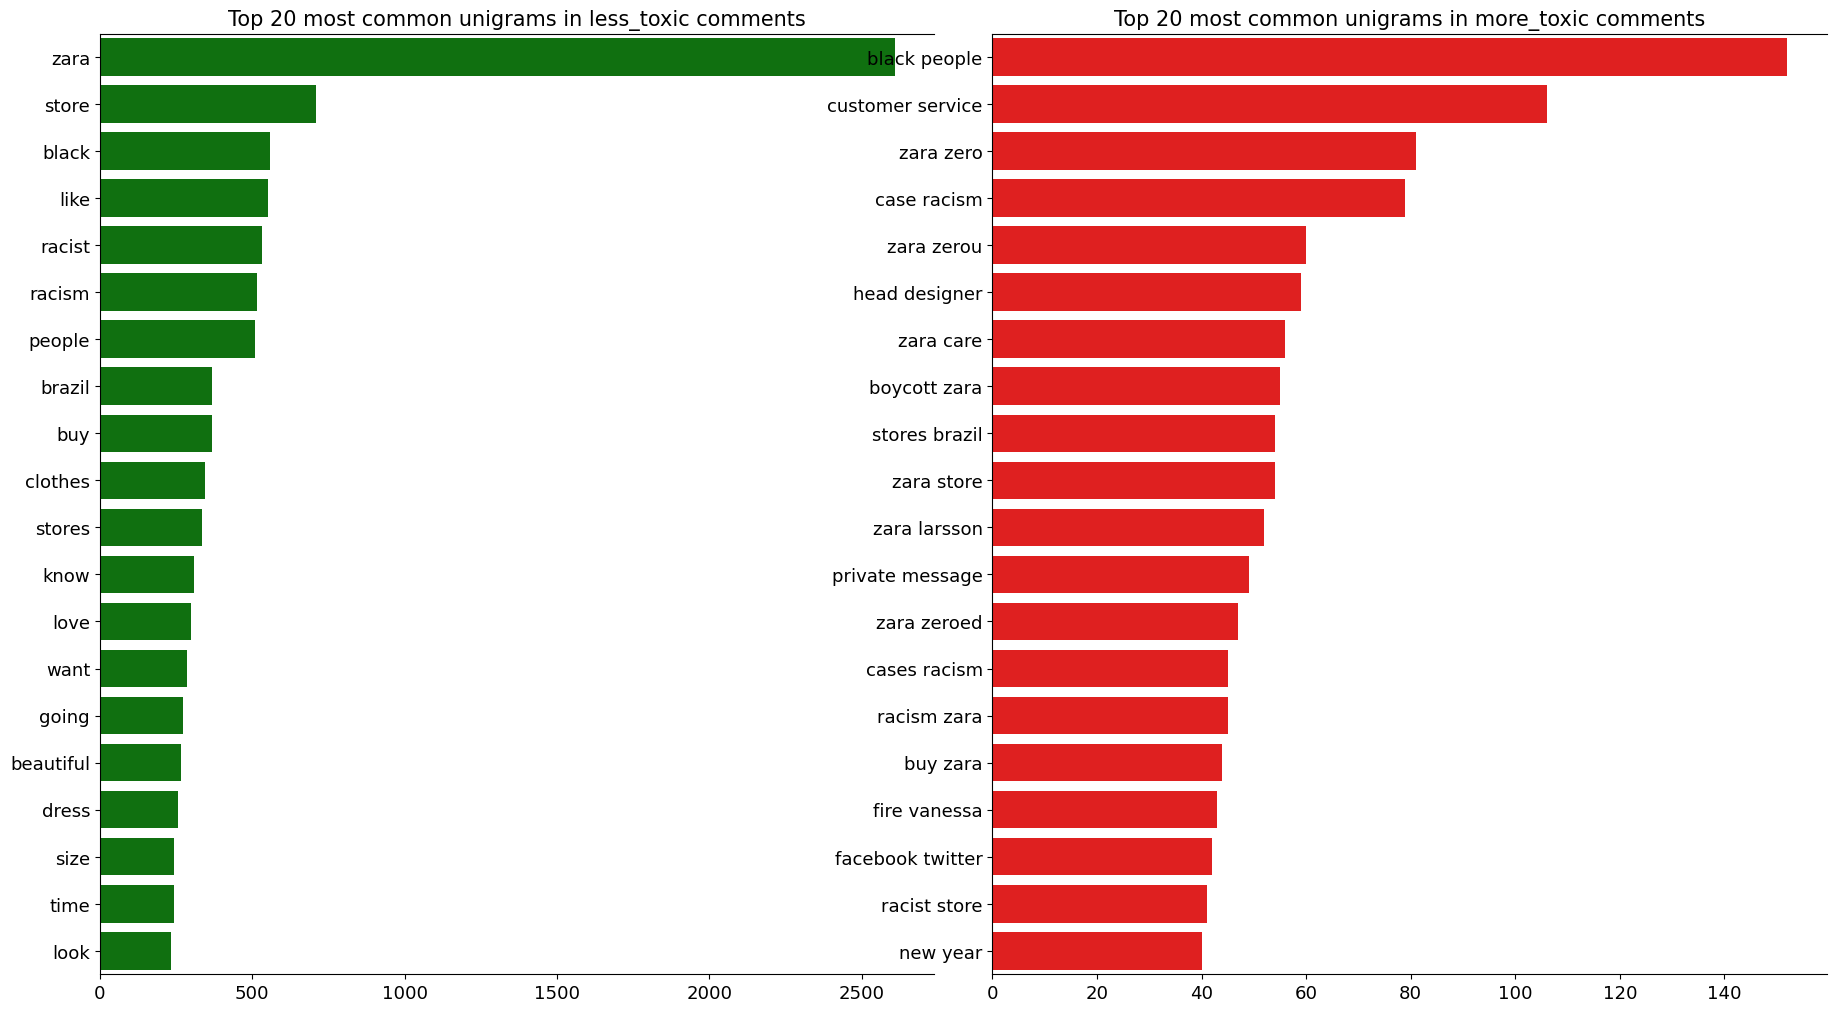

In [109]:
N = 20
fig, axes = plt.subplots(ncols=2, figsize=(18, N // 2), dpi=100)
plt.tight_layout()

sns.barplot(y=df_ngram_1[:N][0], x=df_ngram_1[:N][1], ax=axes[0], color='green')
sns.barplot(y=df_ngram_2[:N][0], x=df_ngram_2[:N][1], ax=axes[1], color='red')
for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in less_toxic comments', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in more_toxic comments', fontsize=15)

plt.show()

In [140]:
from gensim.models.ldamodel import LdaModel
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

/Users/chipanatica/opt/anaconda3/envs/TFM/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



In [142]:
def create_lda_model(id_dict, corpus, num_topics):
    lda_model = LdaModel(corpus=corpus,
                         id2word=id_dict,
                         num_topics=num_topics,
                         random_state=100,
                         chunksize=100,
                         passes=10)
    return lda_model

In [150]:
texts = df_text['comment'].values
texts = [d.split() for d in texts]
id_dict = corpora.Dictionary(texts)
corpus = [id_dict.doc2bow(text) for text in texts]

In [151]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1)], [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1)], [(14, 1)], [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(0, 1)], [(21, 1), (22, 1)], [(12, 1), (23, 1)], [(3, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(35, 1)], [(25, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(6, 1), (23, 1), (25, 1), (30, 1), (33, 1), (34, 1), (37, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1)], [(61, 1), (62, 1), (63, 1), (64, 1), (65, 1)], [(66, 1), (67, 1), (68, 1), (69, 1)], [(70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(7, 1), (19, 1), (75, 1), (76, 1)], [(13, 1), (77, 1)], [(78, 1)], [(0, 1), (7, 1), (15, 1), (19, 1), (51, 1), (79, 1), (80, 1)], [(81, 1), (82, 1), (83, 1)], [(19, 2), (20, 1), (51, 1), (82, 1), (84, 

In [152]:
number_topics = 5
lda_model = create_lda_model(id_dict, corpus, number_topics)

In [155]:
pprint(lda_model.print_topics())

[(0,
  '0.059*"store" + 0.038*"brazil" + 0.025*"customer" + 0.025*"zara" + '
  '0.024*"clothes" + 0.022*"service" + 0.016*"return" + 0.015*"order" + '
  '0.014*"money" + 0.011*"worst"'),
 (1,
  '0.050*"black" + 0.040*"people" + 0.021*"know" + 0.019*"sale" + '
  '0.016*"racists" + 0.015*"bought" + 0.014*"brands" + 0.013*"today" + '
  '0.012*"long" + 0.012*"day"'),
 (2,
  '0.034*"stores" + 0.033*"year" + 0.028*"buy" + 0.026*"zara" + 0.026*"new" + '
  '0.016*"spanish" + 0.016*"going" + 0.012*"shop" + 0.011*"sales" + '
  '0.010*"think"'),
 (3,
  '0.024*"time" + 0.018*"shame" + 0.017*"hello" + 0.015*"happy" + 0.014*"pay" '
  '+ 0.013*"employees" + 0.013*"shopping" + 0.013*"coat" + 0.012*"want" + '
  '0.010*"right"'),
 (4,
  '0.066*"zara" + 0.057*"racism" + 0.044*"racist" + 0.034*"brand" + '
  '0.022*"case" + 0.015*"thank" + 0.015*"company" + 0.014*"stop" + '
  '0.013*"sold" + 0.011*"cases"')]


In [156]:
def test_new_example(lda, id_dict, input_string):
    bow = id_dict.doc2bow(input_string)
    topics = lda[bow]
    print(topics)
    return topics

In [161]:
df_text_pred = df_text['comment'].apply(lambda x: test_new_example(lda_model, id_dict, x.split(' ')))

[(0, 0.045784462), (1, 0.045875244), (2, 0.045787223), (3, 0.04591902), (4, 0.816634)]
[(0, 0.055380374), (1, 0.42366236), (2, 0.41001597), (3, 0.055497956), (4, 0.055443365)]
[(0, 0.21830213), (1, 0.22279888), (2, 0.033945236), (3, 0.301798), (4, 0.22315578)]
[(0, 0.40004098), (1, 0.39994162), (2, 0.06667238), (3, 0.06667253), (4, 0.06667245)]
[(0, 0.100004315), (1, 0.5999826), (2, 0.100004315), (3, 0.10000439), (4, 0.10000437)]
[(0, 0.02957612), (1, 0.029586002), (2, 0.02957651), (3, 0.02959431), (4, 0.881667)]
[(0, 0.10000298), (1, 0.10000303), (2, 0.10000298), (3, 0.100003056), (4, 0.5999879)]
[(0, 0.68881536), (1, 0.077795215), (2, 0.07765038), (3, 0.07792578), (4, 0.07781325)]
[(0, 0.7286879), (1, 0.06666749), (2, 0.067786135), (3, 0.0666675), (4, 0.07019102)]
[(0, 0.042165782), (1, 0.04227433), (2, 0.042209264), (3, 0.8310131), (4, 0.042337574)]
[(0, 0.15041956), (1, 0.025160963), (2, 0.27911887), (3, 0.15229002), (4, 0.3930106)]
[(0, 0.10099395), (1, 0.10100528), (2, 0.10099434

In [168]:
def get_best_topic(results: list):
    pred = 0
    topic = 0
    for i in results:
        if i[1] > pred:
            pred = i[1]
            topic = i[0]

    return  topic

def get_best_pred(results: list):
    pred = 0
    topic = 0
    for i in results:
        if i[1] > pred:
            pred = i[1]
            topic = i[0]

    return  pred
df_text['pred'] = df_text_pred.apply(lambda x: get_best_pred(x))
df_text['topic'] = df_text_pred.apply(lambda x: get_best_topic(x))

In [176]:
df_integrate = pd.concat([df_text.reset_index(), df_pca], axis=1)

In [178]:
px.scatter(x=df_integrate['PCA1'], y=df_integrate['PCA2'], color=df_integrate['topic'])

In [184]:
df_integrate.iloc[:, 1:].to_csv('../data/topic.csv', index=False)